# Hypothesis Testing for a Single Sample

**Hypothesis Testing Steps:**

1. State null and alternative hypotheses and significance level.
2. Assume that the null hypothesis is true, and choose  a statistic to calculate based on your observed values.
3. Determine/estimate how your chosen statistic is distributed under the null hypothesis
4. Find the $p$-value: how often would you see a sample statistic as extreme or more extreme than the one you observed?
5. If $p$-value is smaller than the significance level, reject the null hypothesis. Otherwise, do not reject the null hypothesis.

## Hypothesis Testing for a Single Mean

The American Time Use Survey (ATUS) measures the amount of time people spend doing various activities, such as paid work, childcare, volunteering, and socializing.

Based on this survey, Americans reported that on average, they spend 527 minutes sleeping.

You suspect that unemployed people will spend more time than the average person sleeping. To try and determine if this is true, you have a sample of the amount of time spent sleeping as reported by 20 unemployed participants contained in the `time_use_sample.csv` file.

**Null and alternative hypotheses:**

Null hypothesis: unemployed people sleep the same amount on average as the general population.

$H_0: \mu = 527$

Alternative hypothesis, unemployed people sleep more on average than the general population.

$H_1: \mu > 527$

This is a **one-tailed** test, since you are only interested in testing is the average is greater than 527, rather than if it is not equal to 527.

Also, you need to specify our significance level. Here, you can use the standard significance level of 0.05.

Now, let's look at the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
time_use_sample = pd.read_csv('../data/time_use_sample.csv')

time_use_sample.head()

,participant_id,minutes_spent_sleeping
0,20180101180006,480
1,20180101180021,450
2,20180101180025,845
3,20180101180054,615
4,20180101180096,480


Let's take a look at the distribution of reported sleeping times.

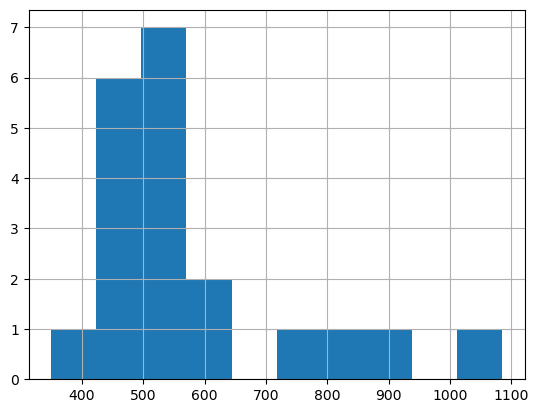

In [5]:
time_use_sample.minutes_spent_sleeping.hist();

In [6]:
time_use_sample['minutes_spent_sleeping'].describe()

count      20.00000
mean      582.50000
std       176.33864
min       350.00000
25%       480.00000
50%       540.00000
75%       588.75000
max      1085.00000
Name: minutes_spent_sleeping, dtype: float64

On average, in this sample, people reported sleeping for an average of 582.5 minutes, but there was quite a bit of variability, with the standard deviation being 176 minutes.

To run the hypothesis test, you need to quantify how unusual the observed values would be if the null hypothesis were true. You can do this by looking at what the **sampling distribution of the mean** would be, under the null hypothesis. Recall from the confidence intervals section that, as long as the population is approximately normal, or you have a large enough sample size, you can use a $t$-distribution to understand the sampling distribution of the mean.

Specifically, 
$$t = \frac{\bar{x} - \mu}{s/\sqrt{n}}$$ 

follows a $t$-distribution with $n-1$ degrees of freedom, where $n$ is the sample size. Here $t$ is your **test statistic** and will be the basis for determining whether or not to reject the null hypothesis.

The sample distribution in this case is slightly skewed to the right, but looks close enough to normal that you should be okay in using a $t$-test.

In [7]:
from scipy.stats import t

Now, calculate the test statistic so you can see where it lands on this plot.

In [8]:
mu = 527
x_bar = time_use_sample.minutes_spent_sleeping.mean()
s = time_use_sample.minutes_spent_sleeping.std()

t_value = (x_bar - 527)/(s / np.sqrt(len(time_use_sample)))
print(t_value)

1.407539188071736


What you see is that the observed value is 1.407. Just how unusual would this be, if the null hypothesis were true? First, let's see where the test statistic lands on the sampling distribution of the mean. You can do this using the hypot_plot_mean function imported from nssstats.plots.

In [9]:
from nssstats.plots import hypot_plot_mean 

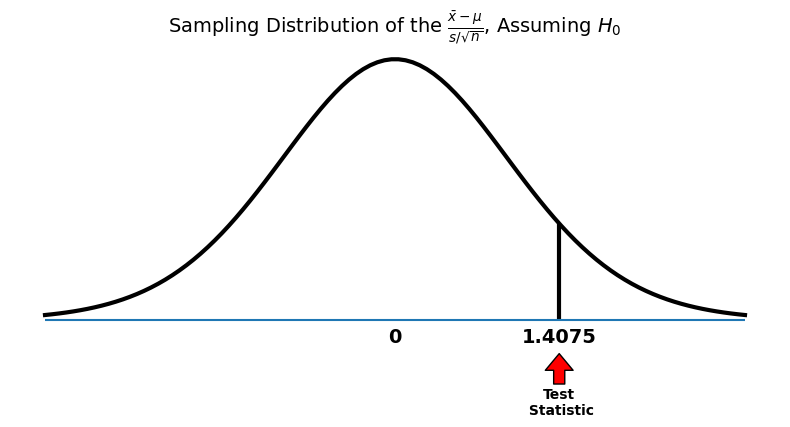

In [10]:
hypot_plot_mean(time_use_sample.minutes_spent_sleeping, popmean=mu, type = 'right', area = False)

Recall that the $p$-value quantifies how unusual an observation would be if the null hypothesis were true. That is, how likely it would be to see a sample mean as extreme or more extreme than the observation. Since you are doing a one-tailed test, more extreme would correspond to a sample test statistic to the right of our observed test statistic. How likely is that? The likelihood is equal to the area under the curve to the right of the observed test statistic.

You can find that area using the cumulative distribution function for the $t$ distribution with 19 degrees of freedom (one fewer than the sample size). Since you are calculating area to the right, you need to use the trick where you subtract the cdf value from 1.

In [11]:
1 - t.cdf(t_value, df = len(time_use_sample) - 1)

0.08770886698597757

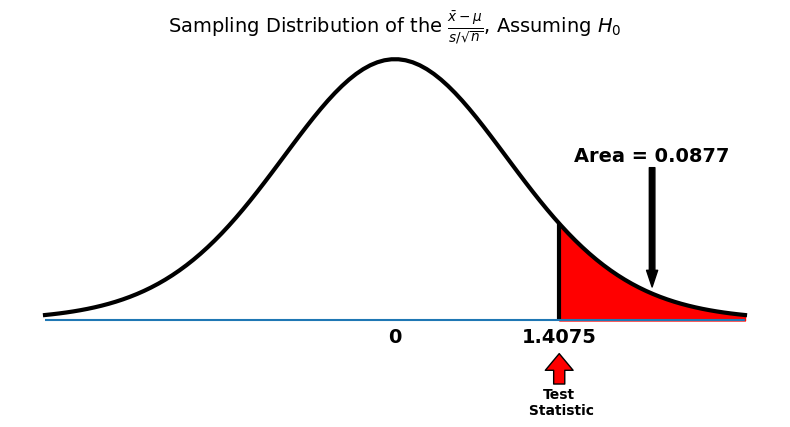

In [12]:
hypot_plot_mean(time_use_sample.minutes_spent_sleeping, popmean=527, type = 'right')

What you can see is that, if the null hypothesis is true, you would see something at least as extreme as our sample mean almost 9% of the time. This is not less than the threshold of 5%, so you should not reject the null hypothesis. You do not have sufficient evidence to conclude that unemployed people sleep more on average than the general population. 

Above, you manually calculated the test statistic and $p$-value, but in practice you can use the `ttest_1samp` function from scipy stats.

In [13]:
from scipy.stats import ttest_1samp

To use this function, you need to pass in the column containing the data you want to test. In this case, that is `time_use_sample.minutes_spent_sleeping`. You also need to pass in the population mean under the null hypothesis. In this case, the hypothesized mean is 527.

Warning - the function `ttest_1samp` does only two-sided tests. This means that you are checking whether the mean is not equal to the proposed population mean. By symmetry of $t$-distributions, you can adjust by cutting the reported $p$-value in half.

In [16]:
t_result = ttest_1samp(time_use_sample.minutes_spent_sleeping, popmean = 527, alternative='greater')
t_result

Ttest_1sampResult(statistic=1.4075391880717358, pvalue=0.0877088669859776)

Based on the results of this test, you see that, even if the true mean is only 527, you will see a sample mean of at least 582.5 8.77% of the time. 

The standard is to only reject the null hypothesis if there is less than a 5% chance of the sample mean being as large as it was. In this case, you do not have enough evidence to reject the null hypothesis and conclude that unemployed people get more sleep than the general population.

Let's try to understand why, even though there was such large difference (almost an hour), you were not able to conclude that this difference really exists. It has to do with two factors:

* First, you had a very large sample standard deviation (120 minutes). When there is a lot of variability in the population, you get a wider sampling distribution, meaning that is it more likely for a given sample mean to be much different from the population mean.

* Second, you have a small sample size. The sampling distribution of the mean's variance is inversely proportional to the sample size, so a small sample size results in a large variance in the sampling distribution, and hence, more likelihood of sample means far from the population mean.

Let's repeat this analysis, but this time with a larger sample size.

In [17]:
time_use_sample_larger = pd.read_csv('../data/time_use_sample_b.csv')

In [18]:
time_use_sample_larger.minutes_spent_sleeping.describe()

count    1000.000000
mean      539.354000
std       149.885391
min         0.000000
25%       450.000000
50%       540.000000
75%       615.000000
max      1350.000000
Name: minutes_spent_sleeping, dtype: float64

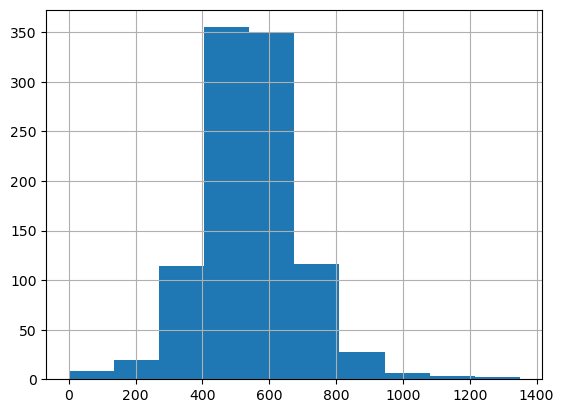

In [19]:
time_use_sample_larger.minutes_spent_sleeping.hist();

**Using same null and alternative hypotheses as above, use `ttest_1samp` to find the $p$-value and state your conclusion.**

In [20]:
t_result = ttest_1samp(time_use_sample_larger.minutes_spent_sleeping, popmean = 527, alternative='greater')
t_result

Ttest_1sampResult(statistic=2.606443367042204, pvalue=0.004642507894729949)

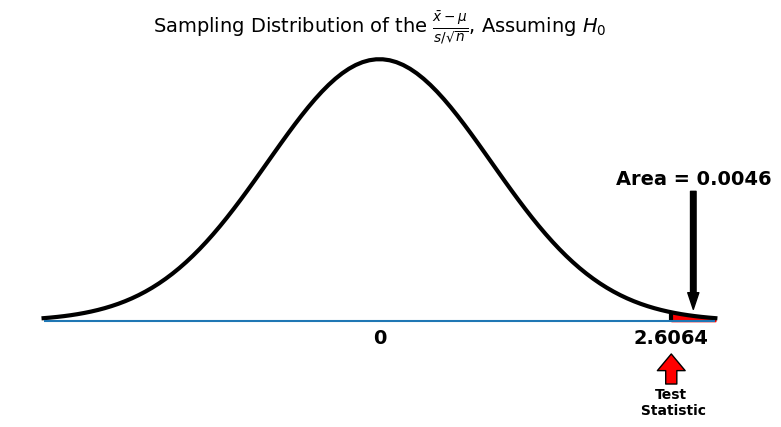

In [21]:
hypot_plot_mean(time_use_sample_larger.minutes_spent_sleeping, popmean = 527, type = 'right')

This time, you still have a very large sample standard deviation, but the sample size is so large, that the sampling distribution will have much lower variance.

The $p$-value that you get shows that, if unemployed people slept on average for 527 minutes, there would only be a 0.5% chance of observing a sample mean at least as large as the one that you observed.

This means that you can reject the null hypothesis in favor of the alternative hypothesis.

## Hypothesis Testing for a Single Proportion

You can test not only a hypothesis about a mean, but also about a proportion. This can be done using the `proportions_ztest` from the `statsmodels` library. 

In [22]:
from scipy.stats import binom

Let's start with the coin example from the slides, where you suspected that our coin was not a fair coin. Recall from the slides that there were two scenarios.

**Scenario 1:** You flip the coin 100 times and get the following outcome:

<table width="150" border="3" style="border: 1px solid black"> 
    <tr> 
        <th colspan="2"style="background-color:lightblue"><div align="center">Observed Outcome</div></th> 
    </tr> 
    <tr> 
        <td style="border: 1px solid black">Heads</td> 
        <td style="border: 1px solid black">47</td> 
    </tr> 
    <tr> 
        <td style="border: 1px solid black">Tails</td> 
        <td style="border: 1px solid black">53</td> 
    </tr> 
</table> 

The first thing you need to do is to state our null and alternative hypothesis.

**Null Hypothesis:** The coin is eqully likely to land on heads and tails.
$$H_0: \text{probability of heads} = 0.5$$

**Alternative Hypothesis:** The coin is more likely to land on one side of the other.
$$H_1: \text{probability of heads} \neq 0.5$$


To find the $p$-value, you can use the binomial distribution. Recall that the $p$-value is the probability of getting an outcome as extreme or more extreme, if the null hypothesis were true.

**Question:** Which outcomes (number of heads) would be as extreme or more extreme than the observed outcome?

Answer: 47 or fewer heads or 53 or more heads.

**Now, use the binomial distribution to calculate the probability of these more extreme outcomes. That is, find the $p$-value.**

In [23]:
binom.cdf(k = 47, n = 100, p = 0.5) + 1 - binom.cdf(k = 52, n = 100, p = 0.5)

0.6172994135892522

**State your conclusion at the 0.05 significance level.**

Since the $p$-value is larger than 0.05, there is not enough evidence to reject the null hypothesis.

Now, using the same null and alternative hypothesis, repeat this for scenario two:

<table width="150" border="3" style="border: 1px solid black"> 
    <tr> 
        <th colspan="2"style="background-color:lightblue"><div align="center">Observed Outcome</div></th> 
    </tr> 
    <tr> 
        <td style="border: 1px solid black">Heads</td> 
        <td style="border: 1px solid black">38</td> 
    </tr> 
    <tr> 
        <td style="border: 1px solid black">Tails</td> 
        <td style="border: 1px solid black">62</td> 
    </tr> 
</table> 

**What outcomes (number of heads) would be considered as extreme or more extreme that what was observed?**

Answer: 38 or fewer or 62 or more.

**Use the binomial distribution to find the $p$-value.**

In [24]:
binom.cdf(k = 38, n = 100, p = 0.5) + 1 - binom.cdf(k = 61, n = 100, p = 0.5)

0.0209787356778518

**State your conclusion at the 0.05 significance level.**

Since p < 0.05, reject the null hypothesis. There is statistically significant evidence that the probability of the coin landing is heads is different than 0.5.

Note that this can also be done using the `binomtest` function from scipy.stats.

In [41]:
from scipy.stats import binomtest

In [42]:
binomtest(
    k=38, 
    n=100, 
    p=0.5
)

BinomTestResult(k=38, n=100, alternative='two-sided', proportion_estimate=0.38, pvalue=0.02097873567785172)

You can also do one-tailed tests for proportions. Let's say you have a die that we think might be loaded and suspect that it is more likely to land on 6. 

**Start by stating the null and alternative hypotheses (if we want to conduct a one-tailed test)**.

$$H_0: \text{probability of rolling a six} = 1/6$$

$$H_1: \text{probability of rolling a six} > 1/6$$

**Your Turn**

You roll it 40 times and count 10 times that it lands on 6. 

**Which outcomes would be considered as extreme or more extreme than what we observed?**

_Give your Answer Here_

**Use a binomial distribution to find the $p$-value**.

In [43]:
# Your Code Here

**State your conclusion at the 0.05 significance level.**

_State your conclusion here._